<a href="https://colab.research.google.com/github/jahnavi1thoom/EDA-week7/blob/main/amazondatasettask1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path='/content/drive/MyDrive/Amazon_electronics.csv'
df=pd.read_csv(path)
print(df)
print("shape")
print(df.shape)
print("info")
print(df.info())
print("unique product categories")
print(df.nunique())





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         item_id  user_id  rating   timestamp model_attr  \
0              0        0     5.0  1999-06-13     Female   
1              0        1     5.0  1999-06-14     Female   
2              0        2     3.0  1999-06-17     Female   
3              0        3     1.0  1999-07-01     Female   
4              0        4     2.0  1999-07-06     Female   
...          ...      ...     ...         ...        ...   
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female   
1292951     9305  1157630     3.0  2018-09-26     Female   
1292952     9303  1157631     5.0  2018-09-29       Male   
1292953     9478  1157632     1.0  2018-10-01     Female   

                        category       brand  year user_attr  split  
0         Portable Audio & Video         NaN  1999       NaN      0  
1         

In [ ]:
print("-------null values--------")
print(df.isnull().sum())
print("------filling numeric values-------")
print(df['rating'].fillna(df['rating'].median(),inplace=True))
print("f-----ill missing catedorical values-------")
df['brand']=df['brand'].fillna('unknown')
df['category']=df['category'].fillna('unknown')
print("-------remove duplicate rows--------")
print(df.drop_duplicates())
print("--------reset index-------")
print(df.reset_index())



-------null values--------
item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64
------filling numeric values-------
None
f-----ill missing catedorical values-------


/tmp/ipython-input-532636818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df['rating'].fillna(df['rating'].median(),inplace=True))


-------remove duplicate rows--------
         item_id  user_id  rating   timestamp model_attr  \
0              0        0     5.0  1999-06-13     Female   
1              0        1     5.0  1999-06-14     Female   
2              0        2     3.0  1999-06-17     Female   
3              0        3     1.0  1999-07-01     Female   
4              0        4     2.0  1999-07-06     Female   
...          ...      ...     ...         ...        ...   
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female   
1292951     9305  1157630     3.0  2018-09-26     Female   
1292952     9303  1157631     5.0  2018-09-29       Male   
1292953     9478  1157632     1.0  2018-10-01     Female   

                        category       brand  year user_attr  split  
0         Portable Audio & Video     unknown  1999       NaN      0  
1         Portable Audio & Video     unknown  1999       NaN      0  
2         Portable Audio & Video

Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path='/content/drive/MyDrive/amazon_products_dataset.csv'
df=pd.read_csv(path)
print("top 5 expensive products")
print(df.nlargest(5,'actual_price'))
brand_highest = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()

print("Brand with highest number of products:", brand_highest)
print("Count:", count)
avg_discount = df.groupby('brand')['discount_price'].mean()
print(avg_discount)
high_rating = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
print(high_rating)
cat_avg_price = df.groupby('category')['actual_price'].mean()
print(cat_avg_price)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
top 5 expensive products
                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0        7666.0  
1974     2.6        5232.0  
1403     2.7        1379.0  
1351     4.8        7596.0  
42       3.8       10252.0  
Brand with highest number of products: Boat
Count: 214
brand
Apple      35889.731579
Boat       36353.115888
Dell       37570.078531
HP         38354.180583
JBL        37380.390821
LG         35108.571154
Mi         36542

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

In [ ]:
import numpy as np
df['discount_percent']=(df['actual_price']-df['discount_price']/df['actual_price'])*100
print(df['discount_percent'])
print("-----price category------")
df['price_category'] = pd.cut(
    df['actual_price'],
    bins=[-np.inf, 500, 2000, np.inf],
    labels=['Budget', 'Midrange', 'Premium']
)
print("----popularity scores------")
print(df['price_category'])
df['popularity_score'] = df.apply(
    lambda x: x['rating'] * np.log(x['rating_count'] + 1),
    axis=1
)
#task 4A
print("----top 10 highest popularity scores-----")
print(df.nlargest(10,"popularity_score"))
print(" Premium items with >40% discount")
print(df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)])

print("Title contains Bluetooth")
print(df[df['title'].str.contains('Bluetooth', case=False, na=False)])

print("Rating >= 4, 20–50% discount, top 30% popularity")
cutoff = df['popularity_score'].quantile(0.70)
print(df[(df['rating'] >= 4.0) &
         (df['discount_percent'].between(20, 50)) &
         (df['popularity_score'] >= cutoff)])

print("-------Avg discount per brand")
print(df.groupby('brand')['discount_percent'].mean())

print("------Avg popularity per price category")
print(df.groupby('price_category')['popularity_score'].mean())

print("------Category with highest avg discount")
print(df.groupby('category')['discount_percent'].mean().idxmax())

print("------Revenue potential per brand")
df['revenue_potential'] = df['actual_price'] * df['rating_count']
print(df.groupby('brand')['revenue_potential'].sum())



0       6.988907e+06
1       6.677004e+06
2       4.359709e+06
3       6.340707e+06
4       4.922309e+06
            ...     
1995    2.413916e+06
1996    6.544801e+06
1997    2.135713e+06
1998    3.522812e+06
1999    3.166102e+06
Name: discount_percent, Length: 2000, dtype: float64
-----price category------
----popularity scores------
0       Premium
1       Premium
2       Premium
3       Premium
4       Premium
         ...   
1995    Premium
1996    Premium
1997    Premium
1998    Premium
1999    Premium
Name: price_category, Length: 2000, dtype: category
Categories (3, object): ['Budget' < 'Midrange' < 'Premium']
----top 10 highest popularity scores-----
                               title    brand    category  actual_price  \
1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
1400         High Resolution Mon

/tmp/ipython-input-3519039057.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('price_category')['popularity_score'].mean())


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Actual Price")
plt.ylabel("Count")
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

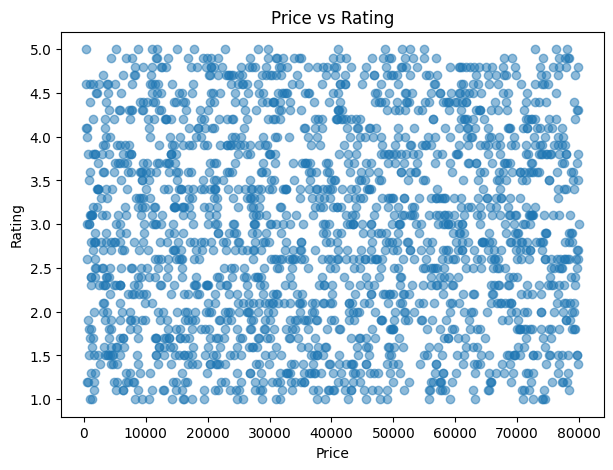

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['actual_price'], df['rating'], alpha=0.5)
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()


In [5]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
cat_avg = df.groupby('category')['rating'].mean().sort_values()

sns.barplot(x=cat_avg.index, y=cat_avg.values)
plt.title("Category-wise Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


NameError: name 'df1' is not defined

<Figure size 1000x500 with 0 Axes>

In [1]:
plt.figure(figsize=(12,6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index)
plt.title("Product Count per Brand")
plt.ylabel("Brand")
plt.xlabel("Count")
plt.show()






NameError: name 'plt' is not defined

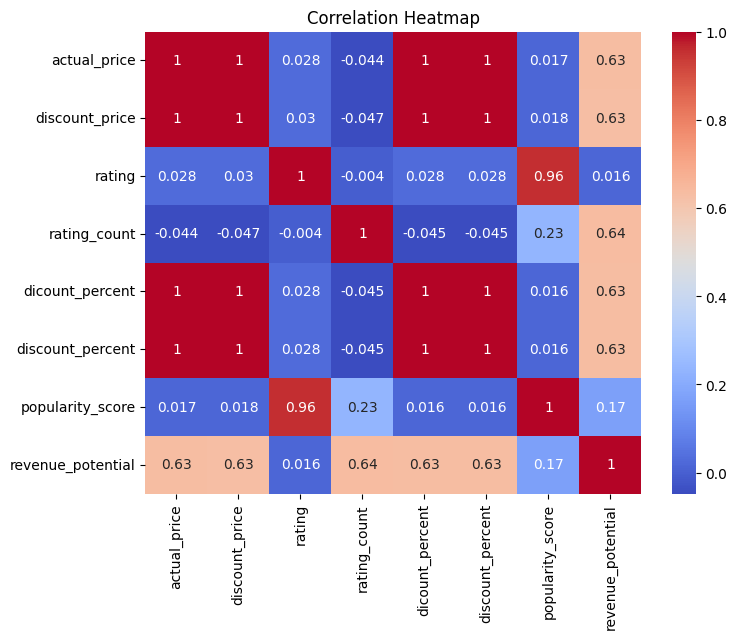

In [ ]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=['number'])   # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()
